# Initialization

REFACTORING IS NEEDED FOR BETTER READING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from regression import Model

In [5]:
df = pd.read_csv('data.csv')

In [3]:
# Colors for line graph
plot_color = ['blue', 'green', 'orange', 'red', 'grey']

# Female ratio

In [6]:
x_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

In [9]:
# Pass a tuple of (week, 'day') and get female rate
female_map = dict(df.groupby(['week', 'day'])['is_female'].mean())

# Create a list of lists of female rate for each week
ratio_list = []
for w in range(1, 6):
    ratio = []
    for d in x_day:
        if (w, d) in female_map:
            ratio.append(female_map[(w, d)])
        else:
            ratio.append(None)
    ratio_list.append(ratio)

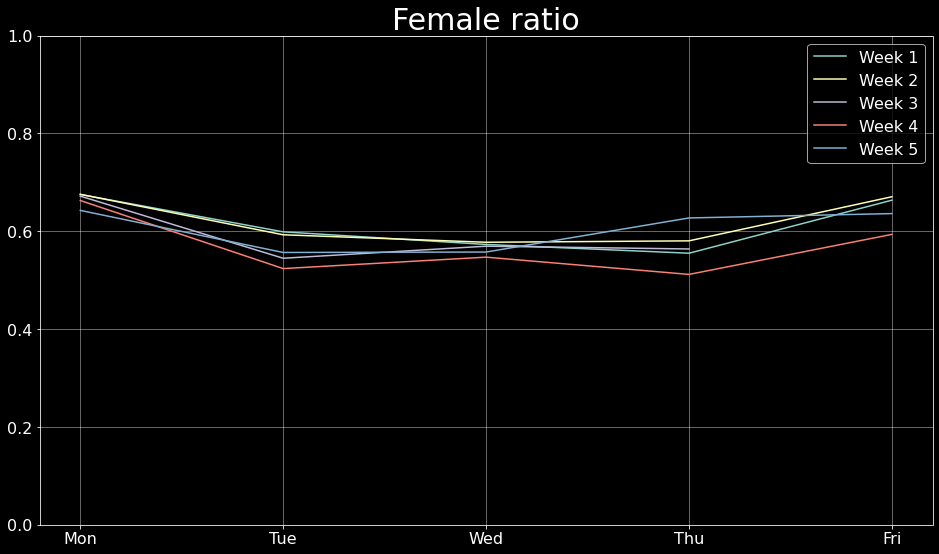

In [10]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    # Plot line-graph for every week
    week_counter = 1
    for y_ratio in ratio_list:
        plt.plot(x_day, y_ratio, label=f'Week {week_counter}')
        week_counter += 1
        
    # Improve view
    plt.title('Female ratio', fontsize=30)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0, 1)
    plt.legend(fontsize=16)
    plt.grid(alpha=0.5)
    
    plt.show()

# Total Passenger

In [11]:
x_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

In [17]:
# Pass a tuple of (week, 'day') and get the number of total passenger
total_passenger_map = dict(df.groupby(['week','day'])['total_passenger'].mean())

# Create a list of lists of total passengers for each week
total_passenger_list = []
for w in range(1, 6):
    tmp = []
    for d in x_day:
        if (w, d) in total_passenger_map:
            tmp.append(total_passenger_map[(w, d)])
        else:
            tmp.append(None)
    total_passenger_list.append(tmp)

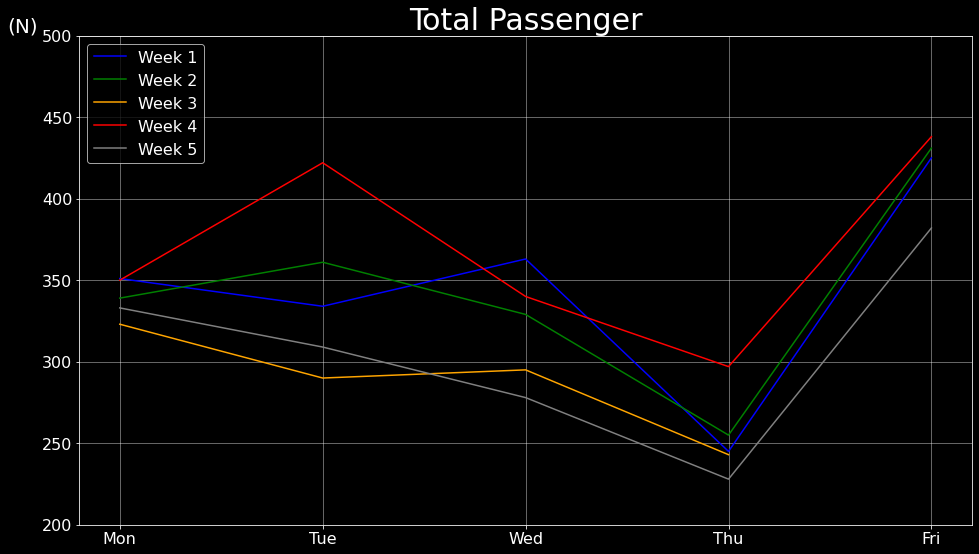

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    # Plot line-graph for every week
    week_counter = 1
    for y_total_passenger in total_passenger_list:
        plt.plot(
            x_day, 
            y_total_passenger, 
            label=f'Week {week_counter}',
            color=plot_color[week_counter -1],
        )
        week_counter += 1
        
    # Improve view
    plt.title('Total Passenger', fontsize=30)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('(N)', fontsize=20, loc='top', rotation=0)
    plt.legend(fontsize=16)
    plt.ylim(200, 500)
    plt.grid(alpha=0.5)
    
    plt.show()

# Passenger Flow

In [19]:
x_minute = list(range(40, 60))
xticks_minute = list(range(40, 60, 2))

x_minute = list(map(lambda v: f'10:{v}', x_minute))
xticks_minute = list(map(lambda v: f'10:{v}', xticks_minute)) 

In [20]:
# Pass a tuple of (week, 'day') and get the number of total passenger per minute
tppm_map = dict(df.groupby(['week', 'time'])['total_passenger_per_minute'].mean())

# Create a list of lists of total passengers per minute for each week
tppm_list = []
for w in range(1, 6):
    tmp = []
    for t in range(40, 60):
        tmp.append(tppm_map[(w, t)])
    tppm_list.append(tmp)

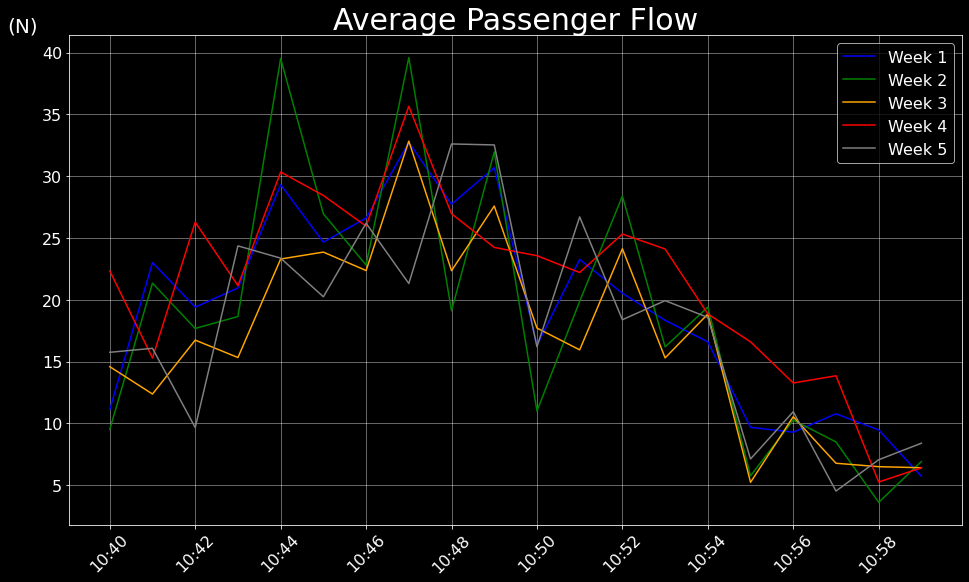

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    # Plot line-graph for every week
    week_counter = 1
    for y_tppm in tppm_list:
        plt.plot(
            x_minute, 
            y_tppm, 
            label=f'Week {week_counter}',
            color=plot_color[week_counter -1],
        )
        week_counter += 1
        
    # Improve view
    plt.title('Average Passenger Flow', fontsize=30)
    plt.xticks(xticks_minute, fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    plt.ylabel('(N)', fontsize=20, loc='top', rotation=0)
    plt.legend(fontsize=16)
    plt.grid(alpha=0.5)
    
    plt.show()

# Stand ratio

In [22]:
x_minute = list(range(40, 60))
xticks_minute = list(range(40, 60, 2))

x_minute = list(map(lambda v: f'10:{v}', x_minute))
xticks_minute = list(map(lambda v: f'10:{v}', xticks_minute)) 

In [24]:
ride_map = {'ls': 1, 'rs': 1, 'lw': 0, 'rw': 0}

# Drop staff member from the DataFrame
dfw = df[df['is_assistant'] == 0].replace({'ride_style': ride_map})

# Pass a tuple of (week, 'day') and get the ride_style dummy
stop_map = dict(dfw.groupby(['week', 'time'])['ride_style'].mean())

stop_list = []
for w in range(1, 6):
    tmp = []
    for t in range(40, 60):
        tmp.append(stop_map[(w, t)])
    stop_list.append(tmp)

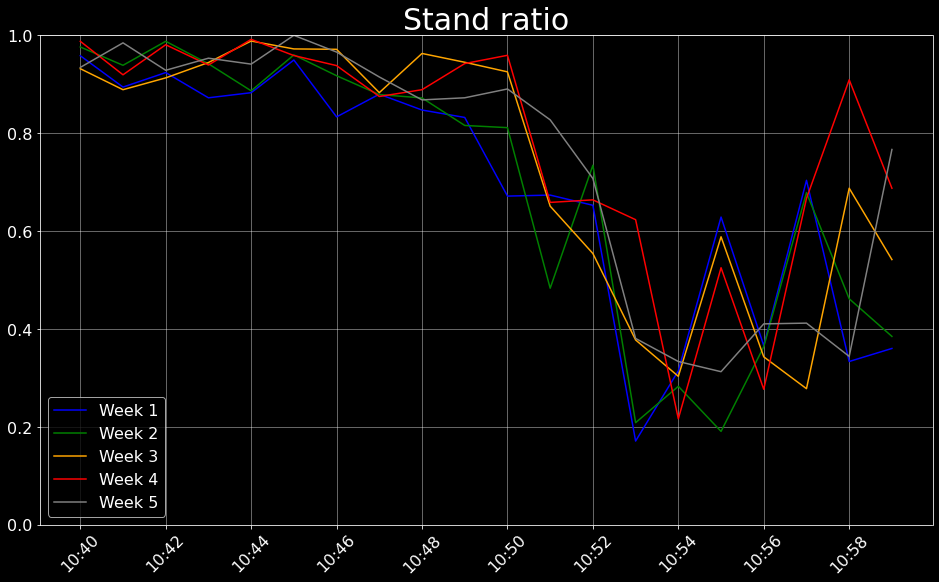

In [33]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    # Plot line-graph for every week
    week_counter = 1
    for y_stop in stop_list:
        plt.plot(
            x_minute, 
            y_stop, 
            label=f'Week {week_counter}', 
            color=plot_color[week_counter -1],
        )
        week_counter += 1
        
    # Improve view
    plt.title('Stand ratio', fontsize=30)
    plt.xticks(xticks_minute, fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.ylim(0, 1)
    plt.grid(alpha=0.5)
    
    plt.show()

# Right stand ratio

In [21]:
x_minute = list(range(40, 60))
xticks_minute = list(range(40, 60, 2))

x_minute = list(map(lambda v: f'10:{v}', x_minute))
xticks_minute = list(map(lambda v: f'10:{v}', xticks_minute)) 

In [26]:
ride_map = {'ls': 0, 'rs': 1, 'lw': 0, 'rw': 0}
dfrs = df[df['is_assistant'] == 0].replace({'ride_style': ride_map})

rs_map = dict(dfrs.groupby(['week', 'time'])['ride_style'].mean())

rs_list = []
for w in range(1, 6):
    tmp = []
    for t in range(40, 60):
        tmp.append(rs_map[(w, t)])
    rs_list.append(tmp)

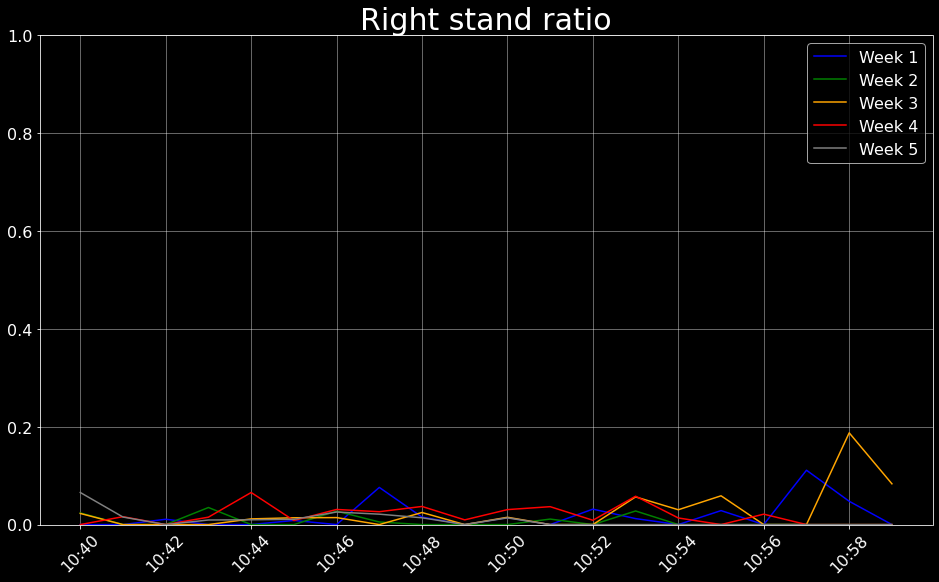

In [37]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    # Plot line-graph for every week
    week_counter = 1
    for y_rs in rs_list:
        plt.plot(
            x_minute, 
            y_rs, 
            label=f'Week {week_counter}', 
            color=plot_color[week_counter -1],
        )
        week_counter += 1
        
    # Improve view
    plt.title('Right stand ratio', fontsize=30)
    plt.xticks(xticks_minute, fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.ylim(0, 1)
    plt.grid(alpha=0.5)
    
    plt.show()

# T-Test 

In [56]:
# t-test for standing on the RIGHT SIDE
ride_map = {'ls': 0, 'rs': 1, 'lw': 0, 'rw': 0}

In [57]:
# Uncomment the following line to do a t-test for standing on both sides
# ride_map = {'ls': 1, 'rs': 1, 'lw': 0, 'rw': 0}

In [58]:
dft = df.replace({'ride_style': ride_map})
dft = dft[(dft['week'] < 5) & (dft['is_assistant'] == 0)]

In [59]:
Y = dft['ride_style']
X = dft[['speed', 'poster', 'staff', 'time', 'is_female', 'is_raining', 'day', 'total_passenger_per_minute']]
m = Model(Y, X, category=['day'])

In [60]:
m.regression(showCorrelation=False)

Regression starts... 

Explained variable: ride_style

Adjusted R-squared: 0.0066

Two-tailed t-test results:

                          Name      Coef   Std Err   t-value   p-value
0                   _constant_ -0.041118  0.016458 -2.498419  0.012331
1                        speed -0.009372  0.003609 -2.597169  0.009308
2                       poster  0.010491  0.003789  2.769157  0.005561
3                        staff  0.011146  0.006296  1.770422  0.076004
4                         time  0.000916  0.000326  2.810114  0.004884
5                    is_female -0.001873  0.003228 -0.580136  0.559141
6                   is_raining -0.020268  0.008981 -2.256830  0.023793
7                      day_Tue  0.014863  0.004964  2.994217  0.002712
8                      day_Wed  0.009066  0.004479  2.024024  0.042518
9                      day_Thu -0.002801  0.003816 -0.734190  0.460424
10                     day_Fri  0.004267  0.004336  0.983939  0.323055
11  total_passenger_per_minute  0.000